In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [58]:
df = pd.read_csv('/content/all_kindle_review .csv')
df

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000
...,...,...,...,...,...,...,...,...,...,...,...
11995,11995,2183,B001DUGORO,"[0, 0]",4,Valentine cupid is a vampire- Jena and Ian ano...,"02 28, 2014",A1OKS5Q1HD8WQC,lisa jon jung,jena,1393545600
11996,11996,6272,B002JCSFSQ,"[2, 2]",5,I have read all seven books in this series. Ap...,"05 16, 2011",AQRSPXLNEQAMA,TerryLP,Peacekeepers Series,1305504000
11997,11997,12483,B0035N1V7K,"[0, 1]",3,This book really just wasn't my cuppa. The si...,"07 26, 2013",A2T5QLT5VXOJAK,hwilson,a little creepy,1374796800
11998,11998,3640,B001W1XT40,"[1, 2]",1,"tried to use it to charge my kindle, it didn't...","09 17, 2013",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",didn't work,1379376000


In [59]:
df1 = df[["rating", "reviewText"]]
df1

,rating,reviewText
0,3,"Jace Rankin may be short, but he's nothing to ..."
1,5,Great short read. I didn't want to put it dow...
2,3,I'll start by saying this is the first of four...
3,3,Aggie is Angela Lansbury who carries pocketboo...
4,4,I did not expect this type of book to be in li...
...,...,...
11995,4,Valentine cupid is a vampire- Jena and Ian ano...
11996,5,I have read all seven books in this series. Ap...
11997,3,This book really just wasn't my cuppa. The si...
11998,1,"tried to use it to charge my kindle, it didn't..."


In [60]:
df1.shape

(12000, 2)

In [61]:
df1.isna().sum()

rating        0
reviewText    0
dtype: int64

In [62]:
df1.duplicated().sum()

0

In [63]:
df1["rating"].value_counts()

rating
5    3000
4    3000
3    2000
2    2000
1    2000
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='Count'>

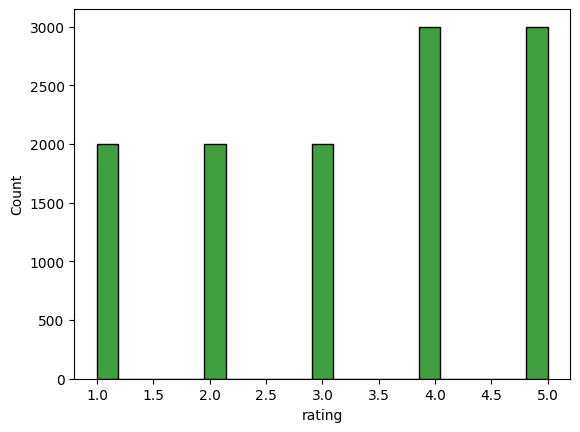

In [64]:
sns.histplot(df1["rating"], color="green")

In [65]:
df1["rating"] = df1["rating"].apply(lambda x:0 if x<3 else 1)
df1.head()

<ipython-input-65-c301b6cf3b4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["rating"] = df1["rating"].apply(lambda x:0 if x<3 else 1)


,rating,reviewText
0,1,"Jace Rankin may be short, but he's nothing to ..."
1,1,Great short read. I didn't want to put it dow...
2,1,I'll start by saying this is the first of four...
3,1,Aggie is Angela Lansbury who carries pocketboo...
4,1,I did not expect this type of book to be in li...


In [66]:
df1["rating"].value_counts()

rating
1    8000
0    4000
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='Count'>

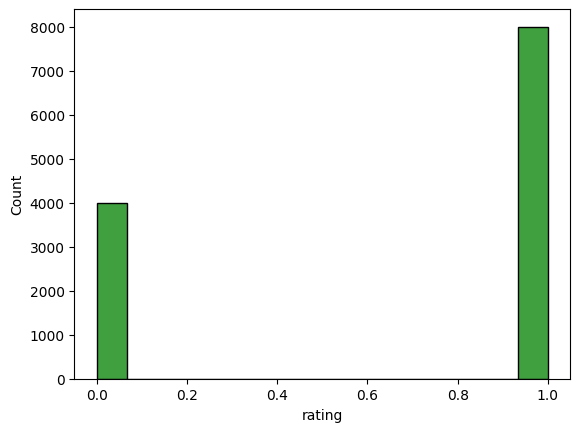

In [67]:
sns.histplot(df1["rating"], color="green")

# Preprocessing

## Lowercase

In [68]:
df1["reviewText"] = df1["reviewText"].str.lower()
df1.head()

<ipython-input-68-402374d5680f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["reviewText"] = df1["reviewText"].str.lower()


,rating,reviewText
0,1,"jace rankin may be short, but he's nothing to ..."
1,1,great short read. i didn't want to put it dow...
2,1,i'll start by saying this is the first of four...
3,1,aggie is angela lansbury who carries pocketboo...
4,1,i did not expect this type of book to be in li...


## More text cleaning

In [69]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)

    # Remove additional spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])

    return text

In [71]:
df1['reviewText'] = df1['reviewText'].apply(clean_text)
df1

<ipython-input-70-b77469389292>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-71-7d65015e2cda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviewText'] = df1['reviewText'].apply(clean_text)


,rating,reviewText
0,1,jace rankin may short nothing mess man hauled ...
1,1,great short read want put read one sitting sex...
2,1,start saying first four books expecting conclu...
3,1,aggie angela lansbury carries pocketbooks inst...
4,1,expect type book library pleased find price right
...,...,...
11995,1,valentine cupid vampire jena ian another vampi...
11996,1,read seven books series apocalyptic adventure ...
11997,1,book really cuppa situation man capturing woma...
11998,0,tried use charge kindle even register charging...


# Lemmatization

In [76]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [77]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [78]:
def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [79]:
df1['reviewText'] = df1['reviewText'].apply(lambda x: lemmatize_text(x))
df1

<ipython-input-79-403b1527a4f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviewText'] = df1['reviewText'].apply(lambda x: lemmatize_text(x))


,rating,reviewText
0,1,jace rankin may short nothing mess man hauled ...
1,1,great short read want put read one sitting sex...
2,1,start saying first four book expecting conclud...
3,1,aggie angela lansbury carry pocketbook instead...
4,1,expect type book library pleased find price right
...,...,...
11995,1,valentine cupid vampire jena ian another vampi...
11996,1,read seven book series apocalyptic adventure o...
11997,1,book really cuppa situation man capturing woma...
11998,0,tried use charge kindle even register charging...


# Train Test Split

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1["reviewText"], df1["rating"], test_size=0.2)

# Vectorization

## BOW and TFIDF

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [90]:
X_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [91]:
X_train_bow.shape

(9600, 23996)

In [92]:
X_test_bow.shape

(2400, 23996)

## Word2Vec

In [112]:
!pip install gensim

In [113]:
import gensim
from gensim.models import Word2Vec

In [114]:
model = Word2Vec(sentences=df1["reviewText"], vector_size=100, window=5, min_count=1, workers=4)

### Getting the vector for a document by averaging the Word2Vec vectors of the words in the document

In [117]:
def document_vector(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in model.wv.key_to_index]
    if len(doc) == 0:  # If no words are in the vocabulary, return a zero vector
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

In [118]:
X_train_w2v = np.array([document_vector(doc) for doc in X_train])
X_test_w2v = np.array([document_vector(doc) for doc in X_test])

In [119]:
print("X_train_w2v:\n", X_train_w2v)
print("X_test_w2v:\n", X_test_w2v)

X_train_w2v:
 [[-0.19145046  0.08403089  0.07077064 ... -0.03066948  0.0228183
  -0.0395848 ]
 [-0.16173054  0.06863831  0.10631455 ... -0.01761339  0.03662749
  -0.04756012]
 [-0.18134975  0.05685697  0.12224004 ... -0.04157528  0.04425557
  -0.02897182]
 ...
 [-0.12728694  0.08360621  0.08060547 ... -0.01425032  0.05426146
  -0.01886764]
 [-0.12893206  0.06049763  0.07191902 ... -0.01196831  0.07561714
   0.00755978]
 [-0.14932409  0.12326023  0.05502851 ...  0.01427576  0.05008607
   0.00926178]]
X_test_w2v:
 [[-0.11607886  0.08455936  0.09102158 ... -0.00147758  0.05834096
  -0.02950341]
 [-0.15410161  0.09391794  0.08627631 ... -0.01878303  0.04351861
  -0.02373361]
 [-0.1317806   0.0716802   0.06717197 ...  0.00544251  0.0683568
  -0.03310606]
 ...
 [-0.12504244  0.07859418  0.07321443 ...  0.00229098  0.07233155
  -0.03992046]
 [-0.1395774   0.09028059  0.08992454 ... -0.00237542  0.04538247
  -0.02591229]
 [-0.14081053  0.09252127  0.10336931 ... -0.00089055  0.05128958
   0.00

In [121]:
print(X_train_w2v.shape)
print(X_test_w2v.shape)

(9600, 100)
(2400, 100)


# Modelling

In [122]:
from sklearn.linear_model import LogisticRegression
lr_bow = LogisticRegression().fit(X_train_bow, y_train)
lr_tfidf = LogisticRegression().fit(X_train_tfidf, y_train)
lr_w2w = LogisticRegression().fit(X_train_w2v, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
from sklearn.naive_bayes import MultinomialNB
nb_bow = MultinomialNB().fit(X_train_bow, y_train)
nb_tfidf = MultinomialNB().fit(X_train_tfidf, y_train)
#nb_w2v = MultinomialNB().fit(X_train_w2v, y_train) #MultinomialNB does not accept negative values that occurs in word2vec

In [124]:
from sklearn.naive_bayes import GaussianNB
nb_bow1 = GaussianNB().fit(X_train_bow, y_train)
nb_tfidf1 = GaussianNB().fit(X_train_tfidf, y_train)
nb_w2v1 = GaussianNB().fit(X_train_w2v, y_train)

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [95]:
y_pred_bow = nb_bow.predict(X_test_bow)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

In [126]:
y_pred_bow1 = nb_bow1.predict(X_test_bow)
y_pred_tfidf1 = nb_tfidf1.predict(X_test_tfidf)
y_pred_w2v1 = nb_w2v1.predict(X_test_w2v)

In [127]:
y_pred_bow2 = lr_bow.predict(X_test_bow)
y_pred_tfidf2 = lr_tfidf.predict(X_test_tfidf)
y_pred_w2v2 = lr_w2w.predict(X_test_w2v)

## BOW, TFIDF and Word2Vec accuracy for Gaussian Naive Bayes

In [100]:
print("BOW: Gaussian")
print("Accuracy:", accuracy_score(y_test, y_pred_bow1))

BOW: Gaussian
Accuracy: 0.5729166666666666


In [101]:
print("TF-IDF: Gaussian")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf1))

TF-IDF: Gaussian
Accuracy: 0.5770833333333333


In [128]:
print("W2V: Gaussian")
print(accuracy_score(y_test, y_pred_w2v1))

W2V: Gaussian
0.5783333333333334


## BOW, TFIDF and Word2Vec accuracy for Logistic Regression

In [106]:
print("BOW: Logistic")
print("Accuracy:", accuracy_score(y_test, y_pred_bow2))

BOW: Logistic
Accuracy: 0.8520833333333333


In [107]:
print("TF-IDF: Logistic")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf2))

TF-IDF: Logistic
Accuracy: 0.8541666666666666


In [129]:
print("W2V: Logistic")
print(accuracy_score(y_test, y_pred_w2v2))

W2V: Logistic
0.6870833333333334


In [108]:
print(classification_report(y_test, y_pred_bow2))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       757
           1       0.89      0.89      0.89      1643

    accuracy                           0.85      2400
   macro avg       0.83      0.83      0.83      2400
weighted avg       0.85      0.85      0.85      2400



In [109]:
print(confusion_matrix(y_test, y_pred_bow2))

[[ 576  181]
 [ 174 1469]]


## BOW and TFIDF accuracy for Multinomial Naive Bayes

In [102]:
print("BOW: Multinomial")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))

BOW: Multinomial
Accuracy: 0.8454166666666667


In [103]:
print("TF-IDF: Multinomial")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))

TF-IDF: Multinomial
Accuracy: 0.7345833333333334


In [110]:
print(classification_report(y_test, y_pred_bow))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       757
           1       0.89      0.88      0.89      1643

    accuracy                           0.85      2400
   macro avg       0.82      0.83      0.82      2400
weighted avg       0.85      0.85      0.85      2400



In [111]:
print(confusion_matrix(y_test, y_pred_bow))

[[ 585  172]
 [ 199 1444]]
